In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
#Machine learning liberary
from sklearn.impute import SimpleImputer

In [3]:
#Reading the file and converting it into dataframe
df = pd.read_csv('Associate XYZ.csv')

In [4]:
df.head()

,Date,No of Leads,Time Spent on LG (in mins)
0,9-1-2023,10.0,180.0
1,10-1-2023,15.0,300.0
2,11-1-2023,11.0,300.0
3,12-1-2023,11.0,300.0
4,13-1-2023,13.0,300.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        61 non-null     object 
 1   No of Leads                 41 non-null     float64
 2   Time Spent on LG (in mins)  41 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [6]:
df.isnull().sum()

Date                           0
No of Leads                   20
Time Spent on LG (in mins)    20
dtype: int64

In [7]:
df.isnull().mean()

Date                          0.000000
No of Leads                   0.327869
Time Spent on LG (in mins)    0.327869
dtype: float64

In [8]:
df.columns

Index(['Date', 'No of Leads', 'Time Spent on LG (in mins)'], dtype='object')

In [9]:
df2 = df

In [10]:
df2 = df

In [11]:
#Converting the Date column datatype to datetime
df2['Date'] = pd.to_datetime(df['Date'],format = '%d-%m-%Y')

In [12]:
#Setting Date column as index of the df2 dataframe
df2.set_index('Date', inplace=True)

In [13]:
# Using interpolate method of machine learning for getting missing values (using time based interpolation method) 
df2 = df2.interpolate(method='time')
#df2 = df2.interpolate(method='nearest')
#df2 = df2.interpolate(method='slinear')
#df2 = df2.interpolate(method='linear')

In [14]:
#Resetting the index again
df2.reset_index(inplace=True)

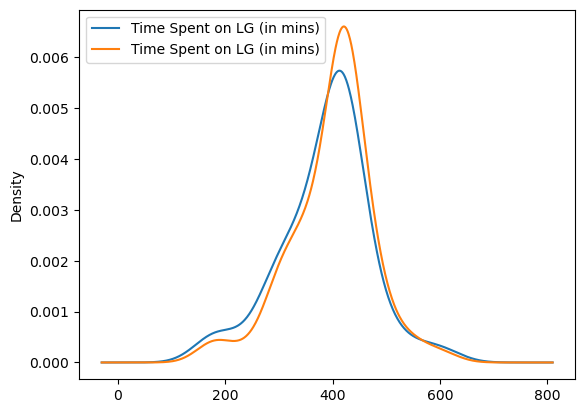

In [15]:
# Showing the variance between the original data (df) consisting missing values and the data (df2) generated with filling values.
# Variance comes out to be very less
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variance distribution  
df['Time Spent on LG (in mins)'].plot(kind = 'kde',ax = ax)

#Now (Mean Applied/filled with the data having NaN in the column)
df2['Time Spent on LG (in mins)'].plot(kind = 'kde',ax = ax)

# Add legends
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

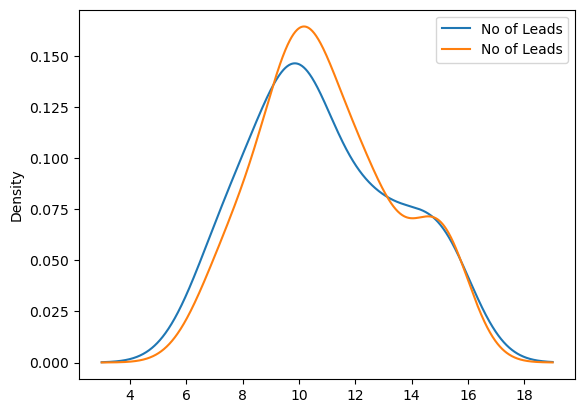

In [16]:
# Showing the variance between the original data (df) consisting missing values and the data (df2) generated with filling values.
# Variance comes out to be very less
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variance distribution  
df['No of Leads'].plot(kind = 'kde',ax = ax)

# Now (Median Applied/filled with the data having NaN in the column)
df2['No of Leads'].plot(kind = 'kde',ax = ax)

# Add legends
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

# Further Analysis

In [17]:
# Reading the initial data again from the same csv file above read.
dfog = pd.read_csv('Associate XYZ.csv')

In [18]:
dfs = pd.DataFrame(dfog)

In [19]:
dfs['Date'] = pd.to_datetime(dfs['Date'],format = '%d-%m-%Y')

In [20]:
dfs.head()

,Date,No of Leads,Time Spent on LG (in mins)
0,2023-01-09,10.0,180.0
1,2023-01-10,15.0,300.0
2,2023-01-11,11.0,300.0
3,2023-01-12,11.0,300.0
4,2023-01-13,13.0,300.0


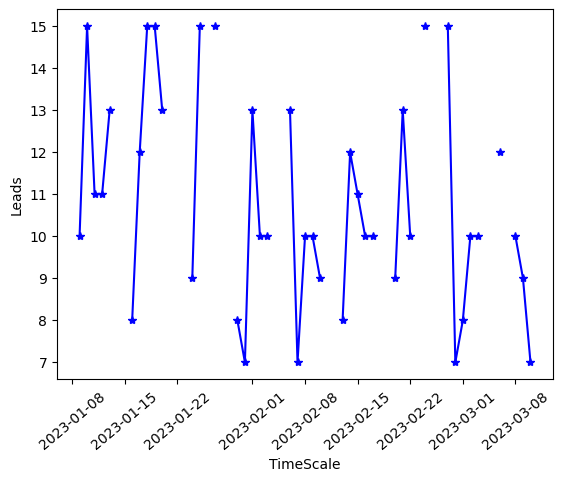

In [21]:
# Showing the line chart of the Leads based on time scale having missing values 
plt.xlabel('TimeScale',fontsize = 10)
plt.ylabel('Leads',fontsize = 10)
plt.plot(dfs['Date'],dfs['No of Leads'], marker = '*', color = 'Blue')
plt.xticks(rotation = 40)
plt.show()

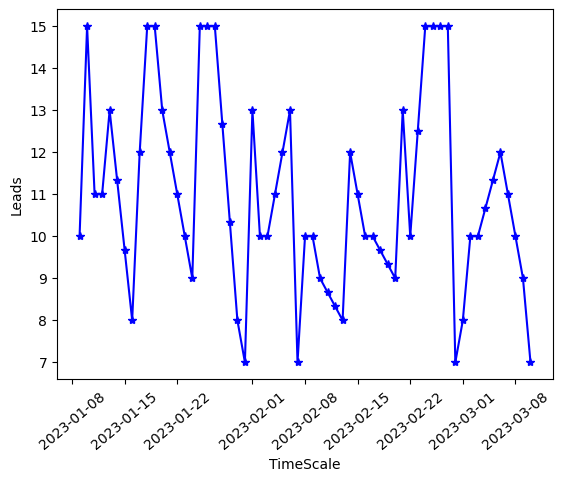

In [22]:
# Showing the line chart of the Leads based on time scale having all values 
plt.xlabel('TimeScale',fontsize = 10)
plt.ylabel('Leads',fontsize = 10)
plt.plot(df2['Date'],df2['No of Leads'], marker = '*', color = 'Blue')
plt.xticks(rotation = 40)
plt.show()

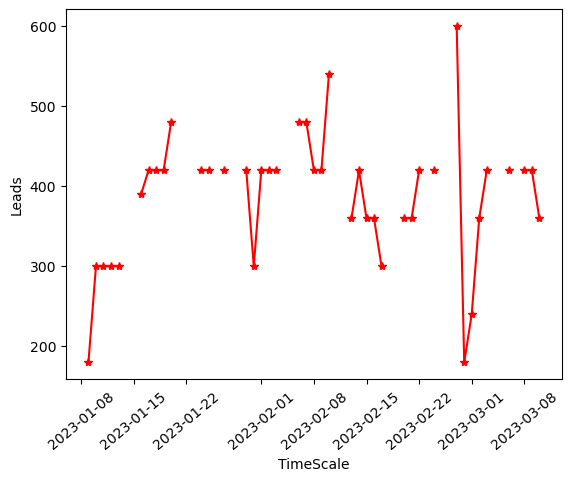

In [23]:
# Showing the line chart of the Time Spent on LG(in mins) based on time scale having missing values 
plt.xlabel('TimeScale',fontsize = 10)
plt.ylabel('Leads',fontsize = 10)
plt.plot(dfs['Date'],dfs['Time Spent on LG (in mins)'], marker = '*', color = 'Red')
plt.xticks(rotation = 40)
plt.show()

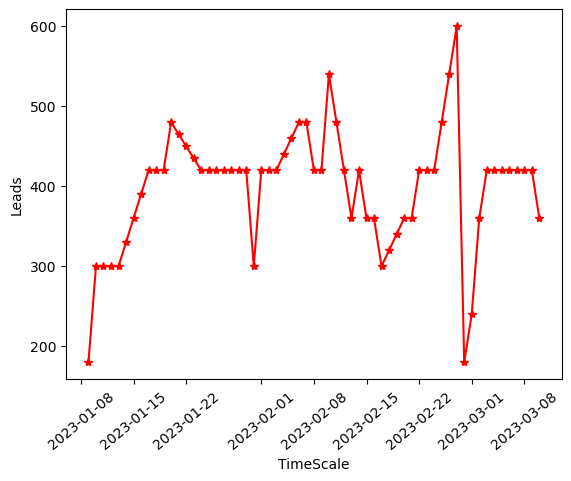

In [24]:
# Showing the line chart of the Time Spent on LG(in mins) based on time scale having all values 
plt.xlabel('TimeScale',fontsize = 10)
plt.ylabel('Leads',fontsize = 10)
plt.plot(df2['Date'],df2['Time Spent on LG (in mins)'], marker = '*', color = 'Red')
plt.xticks(rotation = 40)
plt.show()

In [25]:
# Renaming the dataframe columns
df2 = df2.rename(columns = {'Time Spent on LG (in mins)':"Time_Spent_on_LG_in_mins"})

In [26]:
# Changing the data type of the column (Time_spent_on_LG_in_mins) to integer.
df2['Time_Spent_on_LG_in_mins'] = df2['Time_Spent_on_LG_in_mins'].astype('int64')

In [27]:
# Using the lamba function of python for getting time in hours and seconds (minutes / 60  = hours and remainder = mins --> (HH:MM))
df2['formatted_time'] = df2['Time_Spent_on_LG_in_mins'].apply(lambda x: '{:02d}:{:02d}'.format(*divmod(x, 60)))

In [28]:
df2['formatted_time'] = df2['formatted_time'].astype('string')

In [29]:
df2['Date'] = df2['Date'].astype('string')

In [30]:
# For getting data and time values together using + to concatenate date column and time column (YY-mm-dd HH:MM:SS) here SS will be 00 (no seconds).
df2['Time_Spend_On_LG_datetime'] = df2['Date'] +" "+ df2['formatted_time']

In [31]:
# Getting the required datetime form in the column (YY-mm-dd HH:MM)
df2['Time_Spend_On_LG_datetime'] = pd.to_datetime(df2['Time_Spend_On_LG_datetime'].str[:16], format='%Y-%m-%d %H:%M')

In [32]:
# Locking the dataframe columns
df2 = df2.loc[:,['Date', 'No of Leads', 'Time_Spent_on_LG_in_mins', 'formatted_time','Time_Spend_On_LG_datetime']]

In [33]:
# Locking the dataframe rows
df2 = df2.iloc[0:83]

In [34]:
# Passing the dataframe to another variable
df3 = df2

In [35]:
# Loading the data of the dataframe to the csv file .
df3.to_csv('associate_XYZ_interpolate_time.csv',index = False)